In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
# Define the paths to your training and testing datasets
train_data_dir = 'C:/Users/Admin/lunggg - Copy/rawData/train'
test_data_dir = 'C:/Users/Admin/lunggg - Copy/rawData/test'

In [3]:
# Define parameters
input_shape = (150, 150, 3)
batch_size = 32
epochs = 20
num_classes = 3

In [4]:
# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
# Generate batches of augmented data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 10500 images belonging to 3 classes.


In [7]:
# Load and preprocess the testing dataset
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4500 images belonging to 3 classes.


In [8]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [9]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


Epoch 1/20


C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


328/328 ━━━━━━━━━━━━━━━━━━━━ 1092s 3s/step - accuracy: 0.7730 - loss: 0.4930 - val_accuracy: 0.8808 - val_loss: 0.2902
Epoch 2/20
  1/328 ━━━━━━━━━━━━━━━━━━━━ 4:10 766ms/step - accuracy: 0.9688 - loss: 0.1140

C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 802us/step - accuracy: 0.9688 - loss: 0.0572 - val_accuracy: 1.0000 - val_loss: 0.0443
Epoch 3/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 450s 1s/step - accuracy: 0.8876 - loss: 0.2681 - val_accuracy: 0.9078 - val_loss: 0.2196
Epoch 4/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step - accuracy: 0.9375 - loss: 0.1255 - val_accuracy: 0.9500 - val_loss: 0.0694
Epoch 5/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 377s 1s/step - accuracy: 0.9040 - loss: 0.2248 - val_accuracy: 0.8938 - val_loss: 0.2416
Epoch 6/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.7500 - loss: 0.1867 - val_accuracy: 0.7500 - val_loss: 0.1972
Epoch 7/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 322s 974ms/step - accuracy: 0.9051 - loss: 0.2215 - val_accuracy: 0.9335 - val_loss: 0.1522
Epoch 8/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - accuracy: 0.9688 - loss: 0.0463 - val_accuracy: 1.0000 - val_loss: 0.0252
Epoch 9/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 305s 921ms/step - accuracy: 0.9307 - loss: 0.1676 - val_accur

In [11]:
# Evaluate the model
accuracy = model.evaluate(test_generator, steps=len(test_generator))
print("Test accuracy:", accuracy[1])

141/141 ━━━━━━━━━━━━━━━━━━━━ 42s 300ms/step - accuracy: 0.9651 - loss: 0.0945
Test accuracy: 0.9620000123977661


In [12]:
from tensorflow.keras.models import save_model

# Save your trained model to a file
model.save('model-.h5')  # Replace 'modell.h5' with your desired file name

In [14]:
import matplotlib.pyplot as plt
import random


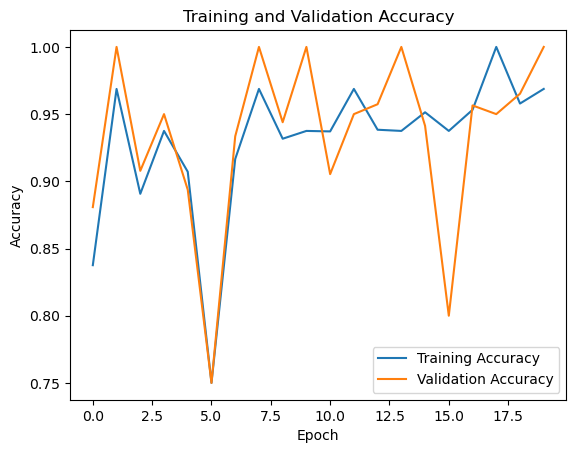

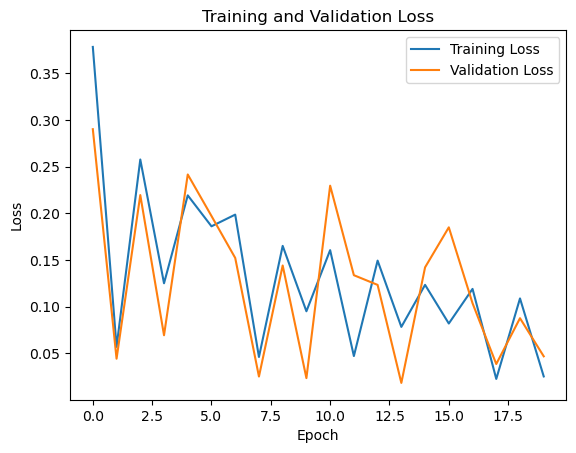

In [15]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
